# HOMEWORK 5

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

In [3]:
filepath = '/Users/tmac/Library/Containers/com.microsoft.Excel/Data/Downloads/treasury_zero_coupon_2022-12-30.xlsx'
prices = pd.read_excel(filepath, sheet_name='prices')
prices.set_index('date',inplace=True)
prices.columns = prices.columns.astype(int)
prices

,1,2,3,4,5
date,,,,,
1952-06-30,0.981778,0.962531,0.942467,0.926341,0.904183
1952-07-31,0.980948,0.960315,0.939312,0.923089,0.898516
1952-08-29,0.980578,0.959750,0.937819,0.921458,0.895717
1952-09-30,0.980312,0.959098,0.937551,0.920961,0.891676
1952-10-31,0.981108,0.959745,0.937583,0.919290,0.897248
...,...,...,...,...,...
2022-08-31,0.965955,0.933432,0.900600,0.871263,0.846584
2022-09-30,0.959839,0.918517,0.880655,0.846696,0.816731
2022-10-31,0.954288,0.914926,0.876564,0.841926,0.811304


In [4]:
px = prices.iloc[-61::12]
px

,1,2,3,4,5
date,,,,,
2017-12-29,0.982422,0.963139,0.942395,0.918869,0.895638
2018-12-31,0.974310,0.951959,0.929327,0.905801,0.882568
2019-12-31,0.984394,0.968938,0.952964,0.935710,0.918910
2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298


In [5]:
spots = -np.log(px)/px.columns
spots

,1,2,3,4,5
date,,,,,
2017-12-29,0.017734,0.018779,0.019777,0.021153,0.022044
2018-12-31,0.026026,0.024617,0.024431,0.024734,0.024984
2019-12-31,0.015729,0.015777,0.016059,0.016612,0.016913
2020-12-31,0.001042,0.001242,0.001571,0.002650,0.003727
2021-12-31,0.003834,0.007303,0.009724,0.011545,0.012659
2022-12-30,0.046425,0.043744,0.041346,0.040322,0.039618


1.1)

In [6]:
F = px[[2,3,4,5]] / px[[1,2,3,4]].values
F

,2,3,4,5
date,,,,
2017-12-29,0.980372,0.978461,0.975036,0.974718
2018-12-31,0.977060,0.976226,0.974684,0.974351
2019-12-31,0.984299,0.983514,0.981894,0.982046
2020-12-31,0.998560,0.997773,0.994129,0.991997
2021-12-31,0.989286,0.985541,0.983136,0.983031
2022-12-30,0.959768,0.964111,0.963434,0.963870


<AxesSubplot: >

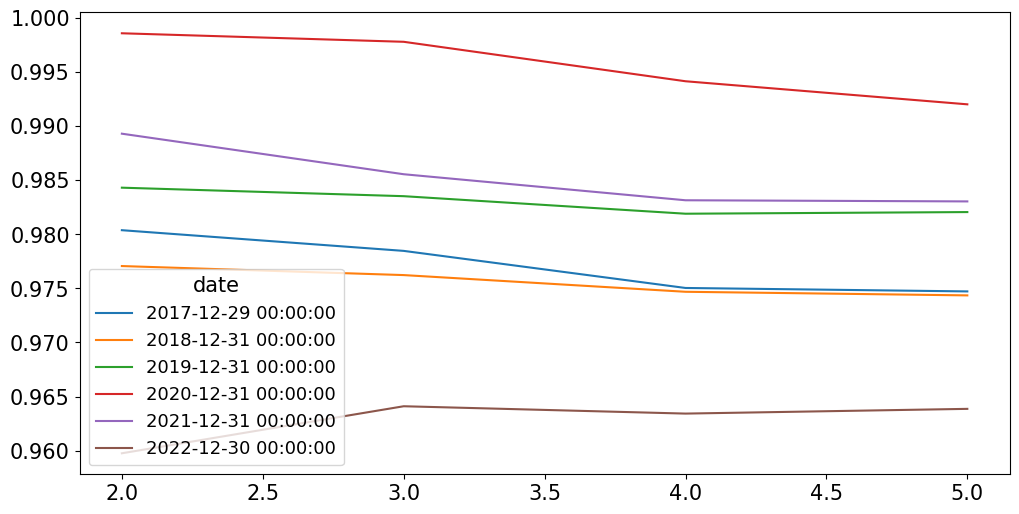

In [7]:
F.T.plot()

1.2)

In [14]:
f = -np.log(F)
f.insert(0,1,spots[1])
f

,1,2,3,4,5
date,,,,,
2017-12-29,0.017734,0.019823,0.021774,0.025281,0.025607
2018-12-31,0.026026,0.023207,0.024061,0.025642,0.025984
2019-12-31,0.015729,0.015825,0.016624,0.018272,0.018117
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035
2021-12-31,0.003834,0.010772,0.014564,0.017008,0.017115
2022-12-30,0.046425,0.041064,0.036548,0.037252,0.036799


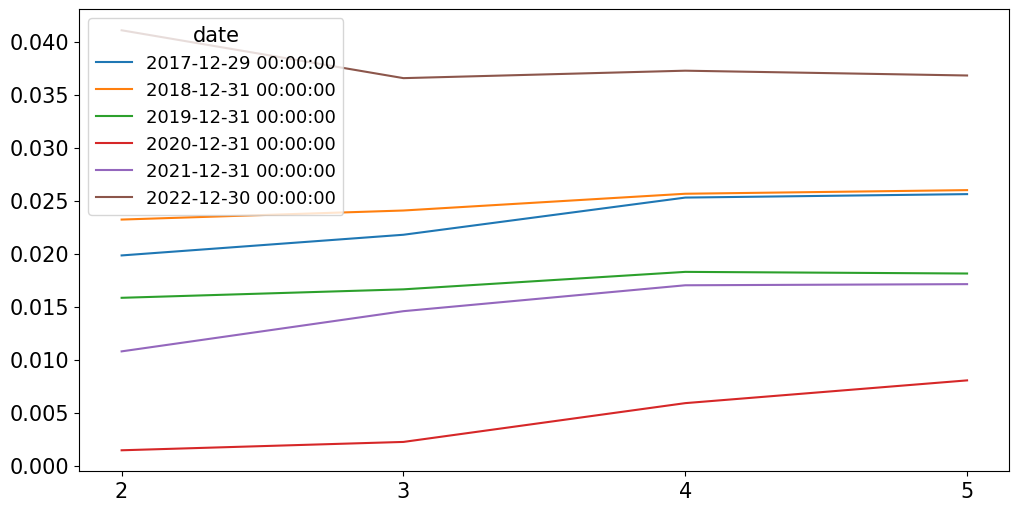

In [11]:
f.T.plot(xticks=f.columns);

1.3)

In [17]:
DATE = '2017'

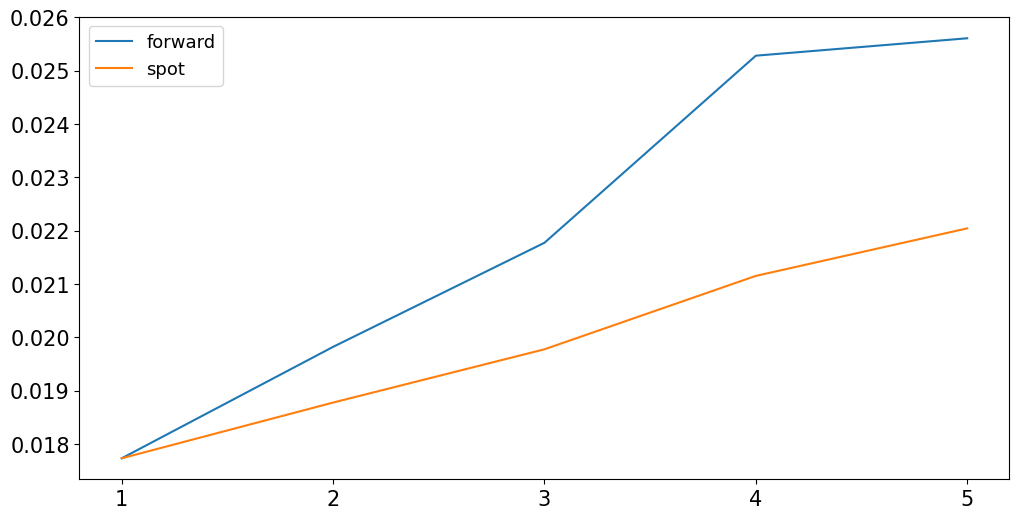

In [18]:
ax = f.loc[DATE].T.plot(xticks=f.columns)
spots.loc[DATE].T.plot(ax=ax)
ax.legend(['forward','spot']);

In [19]:
temp = f.loc[DATE].T

temp.columns.name = f'{DATE}: (n-1) to n'
temp.columns = [f'forward curve']
if DATE == '2017':
    temp['spot over time'] = spots[1].values[:-1]
elif DATE == '2018':
    temp['spot over time'] = spots[1].values[1:]

temp

,forward curve,spot over time
1,0.017734,0.017734
2,0.019823,0.026026
3,0.021774,0.015729
4,0.025281,0.001042
5,0.025607,0.003834


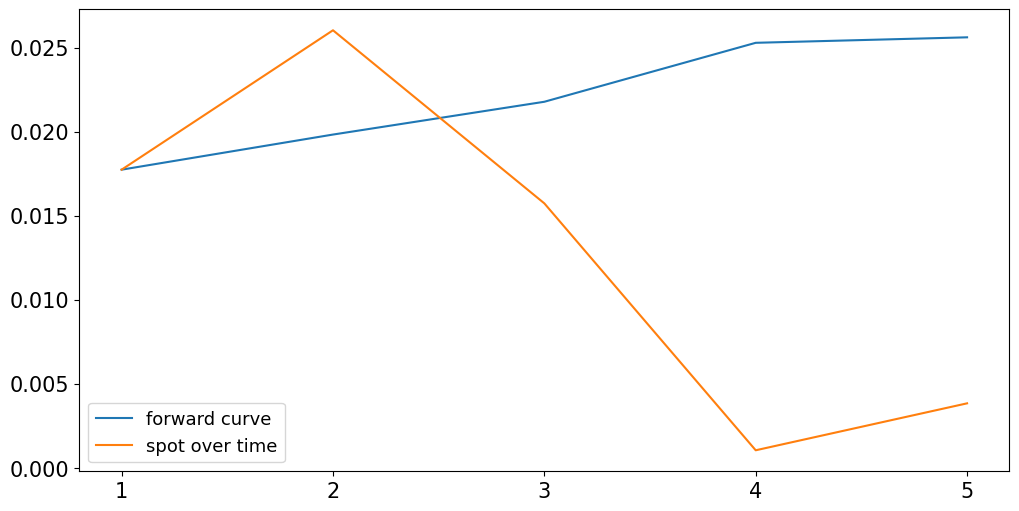

In [20]:
ax = temp.plot(xticks=temp.index)

2.1)

In [21]:
HAIRCUT = .02
INIT_SIZE = 1e8
FACE = 1e6

In [22]:
p = px.copy()
p.insert(0,'cash',1)
p *= FACE

In [23]:
value = pd.DataFrame(dtype=float, columns=p.columns, index=p.index)
pnl = pd.DataFrame(dtype=float, columns=p.columns, index=p.index)

pnl.loc['2017'] = 0
value.loc['2017'] = np.array([0,-INIT_SIZE,0,0,0,INIT_SIZE])
positions = value / p

dt_end = p.index[-1]

for i, dt in enumerate(p.index[1:]):
    dt_lag = p.index[i]
    
    positions.loc[dt] = positions.loc[dt_lag].shift(-1)
    positions.loc[dt,5] = 0        

    
    if dt != dt_end:
        positions.loc[dt,1] += -INIT_SIZE / p.loc[dt,1]
        positions.loc[dt,'cash'] += INIT_SIZE / p.loc[dt,'cash']

    value.loc[dt] = positions.loc[dt] * p.loc[dt]
    pnl.loc[dt] = value.loc[dt] - value.loc[dt_lag]
    pnl.loc[dt,'cash'] = value.loc[dt,'cash']
    
    
pnl.insert(0,'net',pnl.sum(axis=1))
pnl.loc['cumulative','net'] = pnl['net'].sum()

In [24]:
positions.replace(0,np.nan,inplace=True)
positions.style.format('{:,.5}',na_rep='')

,cash,1,2,3,4,5
date,,,,,,
2017-12-29 00:00:00,,-101.79,,,,111.65
2018-12-31 00:00:00,-1.7892,-102.64,,,111.65,
2019-12-31 00:00:00,-2.6368,-101.59,,111.65,,
2020-12-31 00:00:00,-1.5853,-100.1,111.65,,,
2021-12-31 00:00:00,-0.10424,11.268,,,,
2022-12-30 00:00:00,11.268,,,,,


In [25]:
value.replace(0,np.nan,inplace=True)
value.style.format('${:,.2f}',na_rep='')

,cash,1,2,3,4,5
date,,,,,,
2017-12-29 00:00:00,,"$-100,000,000.00",,,,"$100,000,000.00"
2018-12-31 00:00:00,"$-1,789,246.57","$-100,000,000.00",,,"$101,134,709.32",
2019-12-31 00:00:00,"$-2,636,787.00","$-100,000,000.00",,"$106,400,629.08",,
2020-12-31 00:00:00,"$-1,585,323.78","$-100,000,000.00","$111,375,389.81",,,
2021-12-31 00:00:00,"$-104,244.84","$11,225,030.10",,,,
2022-12-30 00:00:00,"$11,268,150.88",,,,,


In [26]:
pnl.replace(0,np.nan,inplace=True)
pnl.style.format('${:,.2f}',na_rep='')

,net,cash,1,2,3,4,5
date,,,,,,,
2017-12-29 00:00:00,,,,,,,
2018-12-31 00:00:00,"$-654,537.25","$-1,789,246.57",,,,"$101,134,709.32","$-100,000,000.00"
2019-12-31 00:00:00,"$2,629,132.76","$-2,636,787.00",,,"$106,400,629.08","$-101,134,709.32",
2020-12-31 00:00:00,"$3,389,436.95","$-1,585,323.78",,"$111,375,389.81","$-106,400,629.08",,
2021-12-31 00:00:00,"$-254,604.54","$-104,244.84","$111,225,030.10","$-111,375,389.81",,,
2022-12-30 00:00:00,"$43,120.77","$11,268,150.88","$-11,225,030.10",,,,
cumulative,"$5,152,548.68",,,,,,


In [27]:
capital = HAIRCUT * INIT_SIZE * 2

cum_ret = pnl['net'].cumsum().drop('cumulative') / capital - 1
cum_ret.name = 'cumulative return'
cum_ret = cum_ret.loc['2018':]
cum_ret

date
2018-12-31   -1.163634
2019-12-31   -0.506351
2020-12-31    0.341008
2021-12-31    0.277357
2022-12-30    0.288137
Name: cumulative return, dtype: float64

2.2)

In this scenario, the trade wouldn't be profitable: the return to holding the 5-year bond would equal the return to holding the one-year bond and rolling it over five years

2.3)

This is a question as to whether the forward-spot spread is bigger in 2017 or 2022. In W.5., we learned (in Dynamic Fact 3) that in times of higher forward-spot spreads, the expected excess return and realized yields are larger.

The table below shows that the forward-spot spread on 5-year bonds was 36bps in 2017 and negative 28bps in 2022. Thus, we expect that the return to this trade (long 5-year bond, short 1-year bond) will be substantially worse in 2022-2027.